In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
real_names = {"tweets_c_500" : "Tweets #Clusters = 500", "tweets_c_50" : "Tweets #Clusters = 50", 
              "tweets_c_100" : "Tweets #Clusters = 100", "tweets_c_250" : "Tweets #Clusters = 250"}

vary_n = [2, 4, 8, 32, 64, 128, 256]
for n in vary_n:
    real_names[f"tweets_c_250_"+str(n)] = f"Table #Cluster 250, Limit {n}"
    real_names[f"tweets_"+str(n)] = f"Table (Without Index) #Cluster 250, Limit {n}"

print(real_names)

{'tweets_c_500': 'Tweets #Clusters = 500', 'tweets_c_50': 'Tweets #Clusters = 50', 'tweets_c_100': 'Tweets #Clusters = 100', 'tweets_c_250': 'Tweets #Clusters = 250', 'tweets_c_250_2': 'Table #Cluster 250, Limit 2', 'tweets_2': 'Table (Without Index) #Cluster 250, Limit 2', 'tweets_c_250_4': 'Table #Cluster 250, Limit 4', 'tweets_4': 'Table (Without Index) #Cluster 250, Limit 4', 'tweets_c_250_8': 'Table #Cluster 250, Limit 8', 'tweets_8': 'Table (Without Index) #Cluster 250, Limit 8', 'tweets_c_250_32': 'Table #Cluster 250, Limit 32', 'tweets_32': 'Table (Without Index) #Cluster 250, Limit 32', 'tweets_c_250_64': 'Table #Cluster 250, Limit 64', 'tweets_64': 'Table (Without Index) #Cluster 250, Limit 64', 'tweets_c_250_128': 'Table #Cluster 250, Limit 128', 'tweets_128': 'Table (Without Index) #Cluster 250, Limit 128', 'tweets_c_250_256': 'Table #Cluster 250, Limit 256', 'tweets_256': 'Table (Without Index) #Cluster 250, Limit 256'}


In [148]:
def plot_speedup(dir, comparisons, name="result", time_file="ALL_TIMINGS.csv"):
    df = pd.read_csv(f"{dir}/{time_file}", header=None)
    print(df)
    speedups = []
    for table in comparisons:
        base = int(df[df[0]==comparisons[table]][1].iloc[0])
        comp = int(df[df[0]==table][1].iloc[0])
        speedups.append({'table': real_names[table], 'speedup' : base/comp})

    result = pd.DataFrame(speedups)

    ax = result.plot(kind='bar', x='table', y='speedup', legend=False, color='none', edgecolor='black')
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())) + "x", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(p.get_x(), 5), textcoords='offset points')
    plt.title(name)
    plt.xlabel('Table')
    plt.ylabel('Speedup')
    plt.show()
            

              0     1
0        tweets  7726
1   tweets_c_50    26
2  tweets_c_100    25
3  tweets_c_250    11
4  tweets_c_500    11


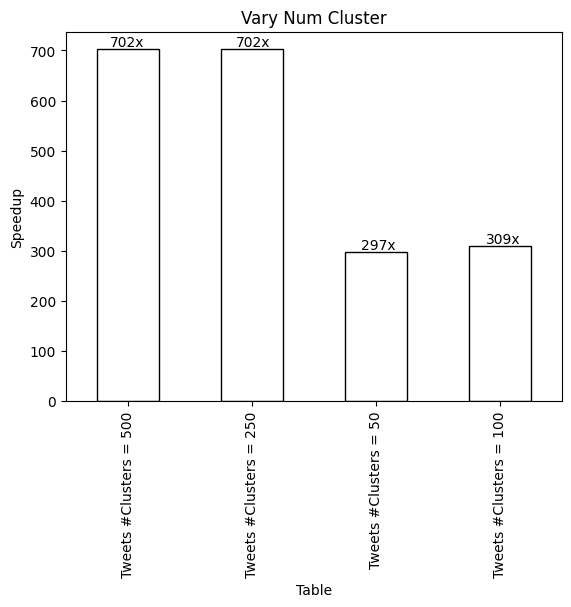

In [149]:
plot_speedup("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_num_cluster", 
             {"tweets_c_500" : "tweets",
              "tweets_c_250" : "tweets",
              "tweets_c_50" : "tweets",
              "tweets_c_100" : "tweets",}, 
               name = "Vary Num Cluster",)

In [152]:
def plot_accuracy(dir, comparisons, name="result"):
    
    percentages = []
    for table in comparisons: 
        baseline_file = f"{dir}/{comparisons[table]}.csv"
        table_file = f"{dir}/{table}.csv"
    
        with open(f"{dir}/{comparisons[table]}.csv", 'r') as file:
            base_lines_data = file.readlines()
        with open(f"{dir}/{table}.csv", 'r') as file:
            table_file = file.readlines()
    
        intersection = set(base_lines_data) & set(table_file)
        percentage = (len(intersection) / min(len(base_lines_data), len(table_file))) * 100
        percentages.append({'table': real_names[table], '% Overlap' : percentage})

    result = pd.DataFrame(percentage)
        ax = result.plot(kind='bar', x='table', y='speedup', legend=False, color='none', edgecolor='black')
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())) + "x", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(p.get_x(), 5), textcoords='offset points')
    plt.title(name)
    plt.xlabel('Table')
    plt.ylabel('Speedup')
    plt.show()

In [151]:
comps = {}
for num in [2, 4, 8, 32, 64, 128, 256]:
    comps[f"tweets_c_250_"+str(num)] = f"tweets_"+str(num)

plot_accuracy("/Users/manyab/AILIKE/go-db/godb/benchmark_results/var_n", 
               comps,
               name = "Vary Num Cluster",)

33.33333333333333
20.0
11.11111111111111
22.22222222222222
22.22222222222222
22.22222222222222
33.33333333333333
